In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# import requirements library
import pandas as pd # mengolah dataset
import numpy as np # fungsi matematis
#membuat graph
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv ("/content/drive/MyDrive/EDA Group 6/data/Global_Cybersecurity_Threats_2015-2024.csv")

#dataset from: "https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024"

In [ ]:
# Preview data
print("Shape:", data.shape)
print("\n5 baris pertama:")
display(data.head())

Shape: (3000, 10)

5 baris pertama:


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
# info struktur
print("\nInfo dataset:")
data.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
# statistik deskriptif
print("\nStatistik deskriptif:")
display(data.describe(include="all").T)


Statistik deskriptif:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,3000,10,UK,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3000.0,NaN,NaN,NaN,2019.570333,2.857932,2015.0,2017.0,2020.0,2022.0,2024.0
Attack Type,3000,6,DDoS,531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target Industry,3000,7,IT,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Financial Loss (in Million $),3000.0,NaN,NaN,NaN,50.49297,28.791415,0.5,25.7575,50.795,75.63,99.99
Number of Affected Users,3000.0,NaN,NaN,NaN,504684.136333,289944.084972,424.0,255805.25,504513.0,758088.5,999635.0
Attack Source,3000,4,Nation-state,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security Vulnerability Type,3000,4,Zero-day,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Defense Mechanism Used,3000,5,Antivirus,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident Resolution Time (in Hours),3000.0,NaN,NaN,NaN,36.476,20.570768,1.0,19.0,37.0,55.0,72.0


In [ ]:
#cek missing value
print("Missing values per kolom:")
missing = data.isnull().sum()
print(missing)

print("\nJumlah duplikat:", data.duplicated().sum())


Missing values per kolom:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

Jumlah duplikat: 0


In [ ]:
# normalisasi nama kolom
# bersihkan spasi di nama kolom
data.columns = [c.strip() for c in data.columns]

# rename agar lebih gampang dipakai
rename_map = {
    "Financial Loss (in Million $)": "financial_loss_musd",
    "Number of Affected Users": "affected_users",
    "Incident Resolution Time (in Hours)": "resolution_hours",
    "Attack Type": "attack_type",
    "Target Industry": "target_industry",
    "Attack Source": "attack_source",
    "Security Vulnerability Type": "vulnerability",
    "Defense Mechanism Used": "defense",
    "Country": "country",
    "Year": "year"
}
data = data.rename(columns={k:v for k,v in rename_map.items() if k in data.columns})
data.head()


,country,year,attack_type,target_industry,financial_loss_musd,affected_users,attack_source,vulnerability,defense,resolution_hours
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
# konversi tipe data
# pastikan kolom numerik jadi angka
for col in ["financial_loss_musd","affected_users","resolution_hours"]:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

# pastikan year jadi integer
if "year" in data.columns:
    data["year"] = pd.to_numeric(data["year"], errors="coerce").astype("Int64")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              3000 non-null   object 
 1   year                 3000 non-null   Int64  
 2   attack_type          3000 non-null   object 
 3   target_industry      3000 non-null   object 
 4   financial_loss_musd  3000 non-null   float64
 5   affected_users       3000 non-null   int64  
 6   attack_source        3000 non-null   object 
 7   vulnerability        3000 non-null   object 
 8   defense              3000 non-null   object 
 9   resolution_hours     3000 non-null   int64  
dtypes: Int64(1), float64(1), int64(2), object(6)
memory usage: 237.4+ KB


In [ ]:
# Tangani missing values
# strategi sederhana:
# - kalau <1% -> drop baris
# - kalau kategori -> isi "Unknown"
# - kalau numerik -> isi median

def handle_missing(df, drop_threshold_pct=1.0):
    n = len(df)
    for col in df.columns:
        pct = df[col].isnull().sum() / n * 100
        if pct == 0: continue
        if pct <= drop_threshold_pct:
            df = df[df[col].notnull()]
            print(f"Dropped rows for {col} ({pct:.2f}%)")
        else:
            if df[col].dtype == "object":
                df[col] = df[col].fillna("Unknown")
                print(f"Filled {col} with 'Unknown' ({pct:.2f}%)")
            else:
                df[col] = df[col].fillna(df[col].median())
                print(f"Filled {col} with median ({pct:.2f}%)")
    return df

data = handle_missing(data)
print("Missing values setelah handling:\n", data.isnull().sum())


Missing values setelah handling:
 country                0
year                   0
attack_type            0
target_industry        0
financial_loss_musd    0
affected_users         0
attack_source          0
vulnerability          0
defense                0
resolution_hours       0
dtype: int64


In [ ]:
# deteksi outlier (IQR)
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    return mask, lower, upper

for col in ["financial_loss_musd","affected_users","resolution_hours"]:
    if col in data.columns:
        mask, lower, upper = detect_outliers_iqr(data, col)
        print(f"{col}: outliers={mask.sum()} (bounds: {lower:.2f} – {upper:.2f})")
        display(data.loc[mask, [col]].head())

financial_loss_musd: outliers=0 (bounds: -49.05 – 150.44)


,financial_loss_musd


affected_users: outliers=0 (bounds: -497619.62 – 1511513.38)


,affected_users


resolution_hours: outliers=0 (bounds: -35.00 – 109.00)


,resolution_hours


In [ ]:
# Analisis deskriptif

In [ ]:
print("Top 5 jenis serangan:")
print(data["attack_type"].value_counts().head())

Top 5 jenis serangan:
attack_type
DDoS             531
Phishing         529
SQL Injection    503
Ransomware       493
Malware          485
Name: count, dtype: int64


In [ ]:
print("\nTop 5 industri target:")
print(data["target_industry"].value_counts().head())


Top 5 industri target:
target_industry
IT            478
Banking       445
Healthcare    429
Retail        423
Education     419
Name: count, dtype: int64


In [ ]:
print("\nTop 5 negara dengan insiden terbanyak:")
print(data["country"].value_counts().head())


Top 5 negara dengan insiden terbanyak:
country
UK        321
Brazil    310
India     308
Japan     305
France    305
Name: count, dtype: int64


In [ ]:
print("\nRingkasan numerik:")
display(data[["financial_loss_musd","affected_users","resolution_hours"]].describe().T)


Ringkasan numerik:


,count,mean,std,min,25%,50%,75%,max
financial_loss_musd,3000.0,50.492970,28.791415,0.5,25.7575,50.795,75.63,99.99
affected_users,3000.0,504684.136333,289944.084972,424.0,255805.2500,504513.000,758088.50,999635.00
resolution_hours,3000.0,36.476000,20.570768,1.0,19.0000,37.000,55.00,72.00


In [ ]:
print("\nKerugian per tahun:")
yearly_loss = data.groupby("year")["financial_loss_musd"].sum()
display(yearly_loss)


Kerugian per tahun:


,financial_loss_musd
year,
2015,14510.21
2016,13947.26
2017,16261.68
2018,14720.48
2019,13134.69
2020,15767.95
2021,15873.41
2022,15870.86
2023,15958.08


In [ ]:
# visualisasi data

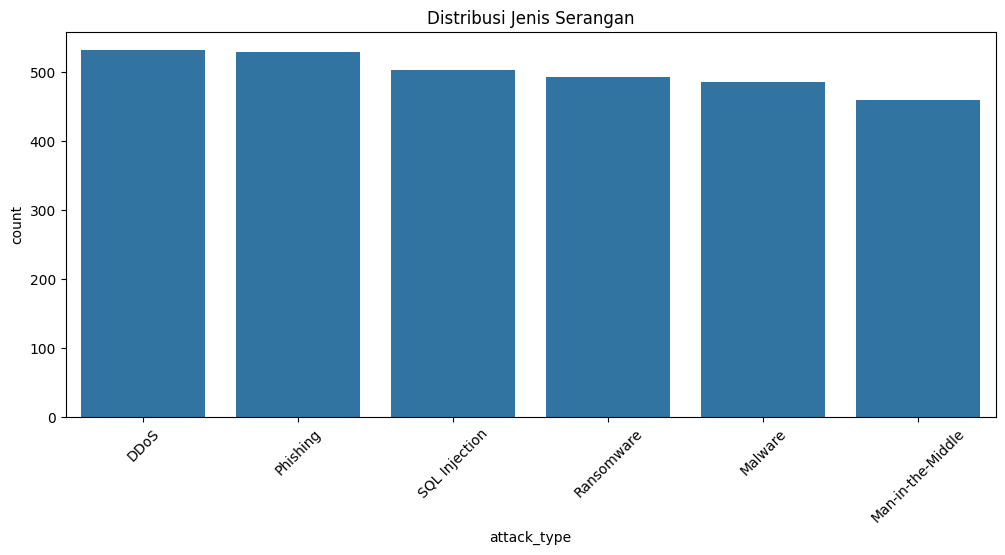

In [ ]:
# distribusi jenis serangan
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="attack_type", order=data["attack_type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Jenis Serangan")
plt.show()

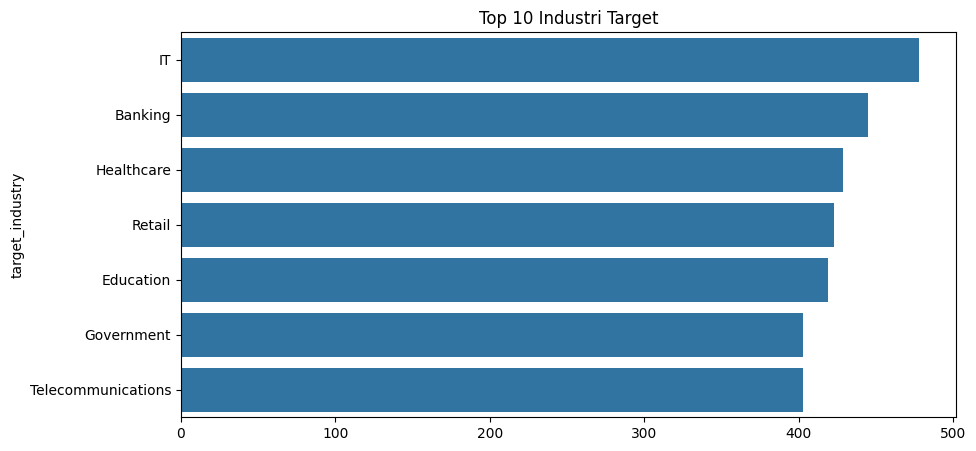

In [ ]:
# Top 10 industri target
plt.figure(figsize=(10,5))
top10 = data["target_industry"].value_counts().nlargest(10)
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Industri Target")
plt.show()


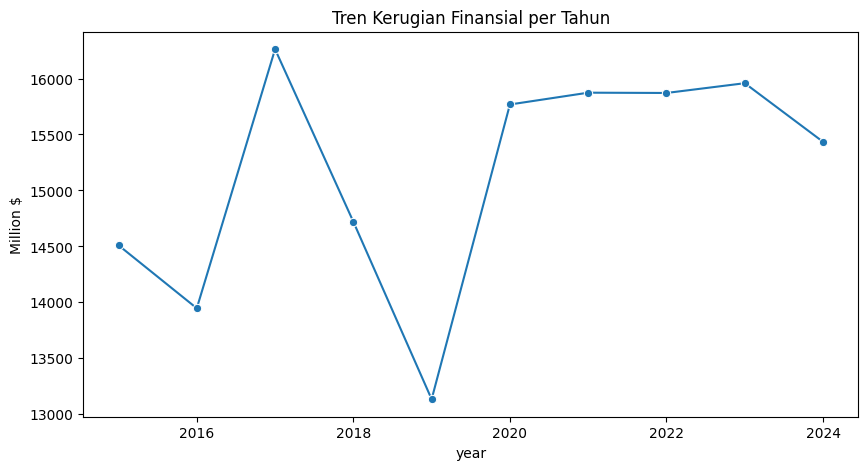

In [ ]:
# Tren kerugian finansial per tahun
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_loss.index, y=yearly_loss.values, marker="o")
plt.title("Tren Kerugian Finansial per Tahun")
plt.ylabel("Million $")
plt.show()

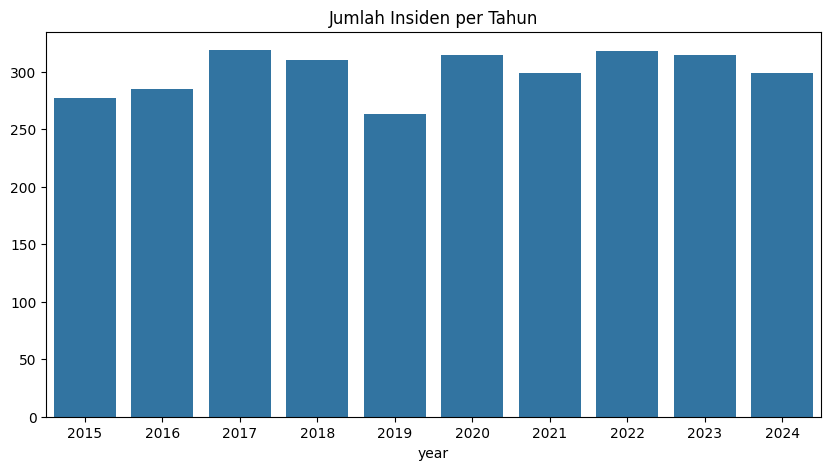

In [ ]:
# Jumlah insiden per tahun
plt.figure(figsize=(10,5))
yearly_incidents = data.groupby("year")["attack_type"].count()
sns.barplot(x=yearly_incidents.index, y=yearly_incidents.values)
plt.title("Jumlah Insiden per Tahun")
plt.show()


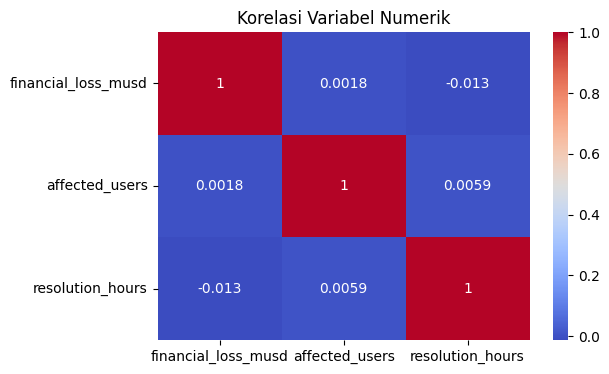

In [ ]:
# Heatmap korelasi variabel numerik
plt.figure(figsize=(6,4))
sns.heatmap(data[["financial_loss_musd","affected_users","resolution_hours"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Korelasi Variabel Numerik")
plt.show()


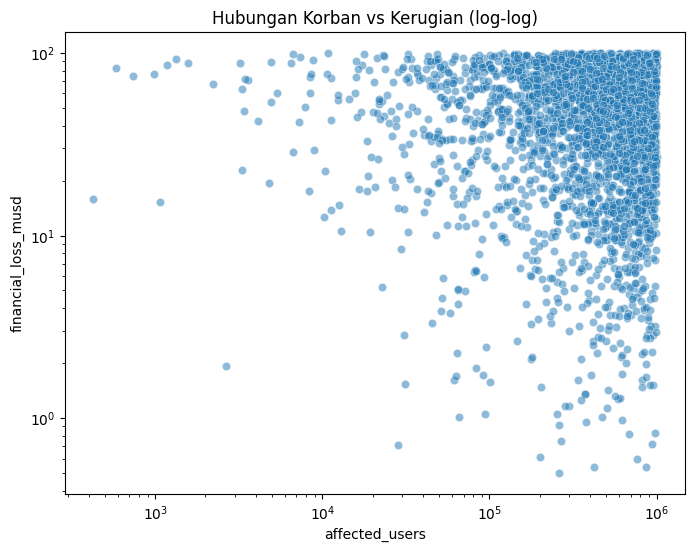

In [ ]:
# Scatterplot korban vs kerugian
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="affected_users", y="financial_loss_musd", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Hubungan Korban vs Kerugian (log-log)")
plt.show()


In [ ]:
# Insight
insights = []

# attack type terbanyak
insights.append("Jenis serangan terbanyak: " + data["attack_type"].value_counts().idxmax())

# target industry terbanyak
insights.append("Industri paling sering jadi target: " + data["target_industry"].value_counts().idxmax())

# tahun dengan kerugian terbesar
insights.append(f"Tahun dengan kerugian terbesar: {yearly_loss.idxmax()} (≈ {yearly_loss.max():,.0f} M$)")

# korelasi
r = data["affected_users"].corr(data["financial_loss_musd"])
insights.append(f"Korelasi jumlah pengguna terdampak vs kerugian: {r:.2f}")

print("INSIGHTS:")
for i, s in enumerate(insights, 1):
    print(f"{i}. {s}")

INSIGHTS:
1. Jenis serangan terbanyak: DDoS
2. Industri paling sering jadi target: IT
3. Tahun dengan kerugian terbesar: 2017 (≈ 16,262 M$)
4. Korelasi jumlah pengguna terdampak vs kerugian: 0.00
